# What’s the Area of a “Pseudo-Square”? (2024.11.01)

link: https://thefiddler.substack.com/p/whats-the-area-of-a-pseudo-square

## I. Puzzle

[image see below]

Sure enough, the shape (or one very much like it) has four “sides” of equal length, with four right angles. However, two of these sides are curved (in particular, they are arcs of circles), and two of the right angles are exterior, meaning the interior angles measure 270 degrees (rather than the usual 90 degrees).

Let’s call shapes like this one “pseudo-squares.” A pseudo-square has the following properties:

- It is a simple, closed curve.
- It has four sides, all the same length.
- Each side is either a straight line segment or the arc of a circle.
- The four sides are joined at four corners, with each corner having an internal angle of 90 degrees or 270 degrees.

The pseudo-square pictured above has two straight sides, which run radially between arcs of two concentric circles.

Assuming this is a unit pseudo-square (i.e., each side has length 1), what is its area?

# II. Solution

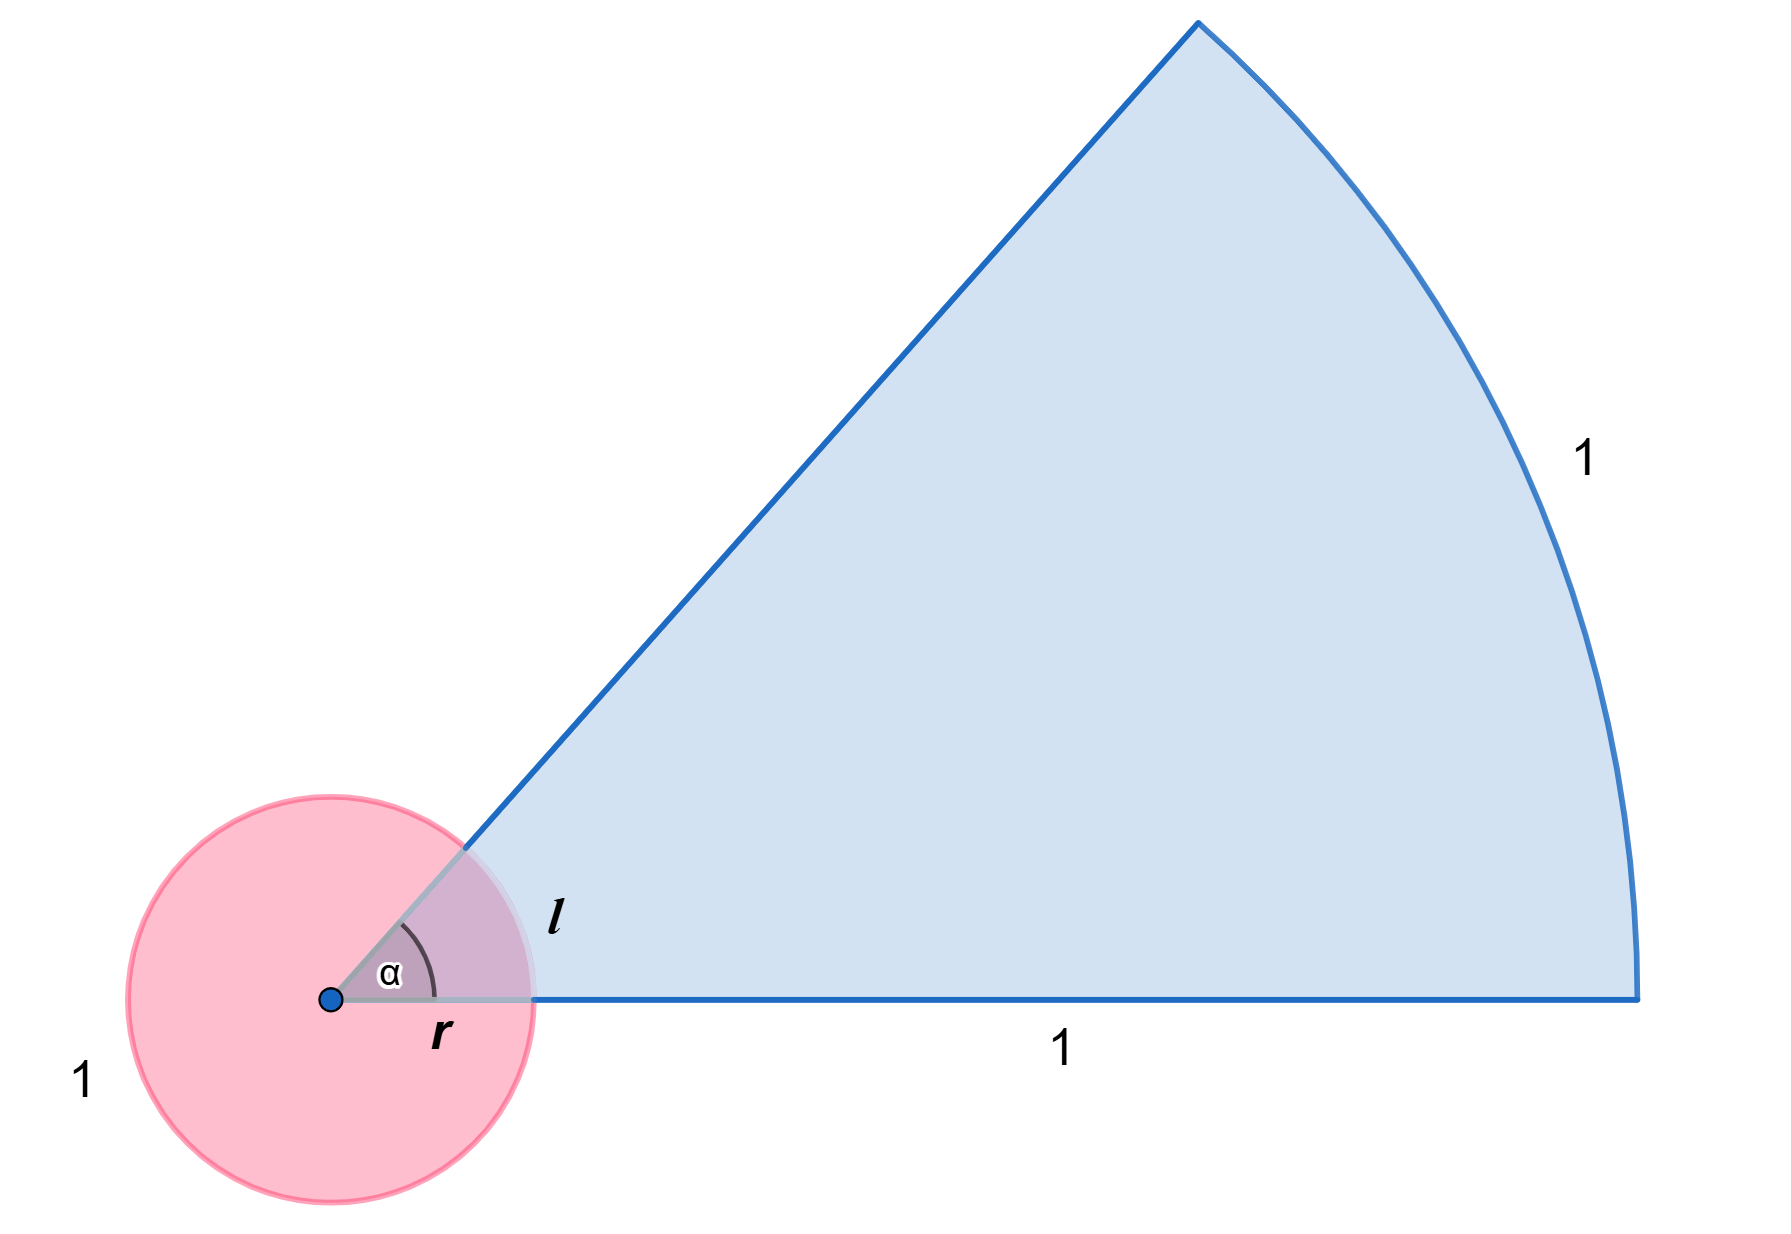

In [3]:
from IPython import display
display.Image("files/pseudo-square.png",width=400)

The length of arc $l$ is given by

$$l = \frac{\alpha}{360} \cdot 2 \pi r \tag{1}$$

As the left arc of the circle has a length of 1, we know that

$$l = 2 \pi r -1\tag{2}$$


From equation (1) and (2) we get the radius $r$ of the circle:
$$r = \frac{180}{\pi(360-\alpha)}\tag{3}$$

The right side of the "pseudo-square" has a length of 1 and it is the arc of a circle with radius $1+r$. Putting that into the equation (1) and (3) we get for $\alpha$


$$\begin{split}
1 & = \frac{\alpha}{360} \cdot 2 \pi \Big(1+\frac{180}{\pi(360-\alpha)}\Big) \\
 \alpha & = \frac{180(1+ \pi - \sqrt{1+ \pi^2})}{\pi} \approx 48.3968 
\end{split}\tag{4}$$


Now we can compute radius $r$ and length $l$:

$$r = \frac{180}{\pi\Big(360-\frac{180(1+ \pi - \sqrt{1+ \pi^2})}{\pi}\Big)}\approx 0.1839$$
$$l = \frac{360 \pi}{\pi\Big(360-\frac{180(1+ \pi - \sqrt{1+ \pi^2})}{\pi}\Big)}-1\approx 0.1553$$


**Solution:** The area $A$ of the "pseudo-square" consists of the area of the  circle and the sector of the larger circle with radius $1+r$  without the area within the smaller circle:

$$A = \pi r^2 + \frac{\alpha \pi}{360} \Big((1+r)^2-r^2 \Big)=\frac{1+\sqrt{1+\pi^2}}{2\pi}\approx 0.6839$$



# III. Scratch Pad

In [4]:
import sympy as sp

In [5]:
l, a, r = sp.symbols('l a r', positive = True)

In [16]:
l = a/360*2 * sp.pi * r

print("r is:")
eq1 = sp.solve(sp.Eq(2*sp.pi*r-1,l),r)[0]
eq1

r is:


-180/(pi*(a - 360))

In [7]:
print("l is:")
eq2 = 2*sp.pi*eq1-1
eq2

l is:


-1 - 360/(a - 360)

In [8]:
eq3 = sp.solve(sp.Eq(1,a/360*2*sp.pi*(eq1+1)),a)
print('alpha is')
eq3[1]

alpha is


180*(-sqrt(1 + pi**2) + 1 + pi)/pi

In [9]:
print("l is:")
eq2.subs(a,eq3[1]).evalf()

l is:


0.155315655885822

In [10]:
print("r is:")
sol_r = eq1.subs(a,eq3[1])
sol_r.evalf()

r is:


0.183874197465684

In [11]:
print("alpha is:")
eq3[1].evalf()

alpha is:


48.3968479385185

In [12]:
# area circle

a1 = (sp.pi * sol_r**2)
a1.evalf()

0.106216369522773

In [13]:
# area section 
a2 = eq3[1]/360*(sp.pi * (1+sol_r)**2)
a2#.evalf()

(-180/(pi*(-360 + 180*(-sqrt(1 + pi**2) + 1 + pi)/pi)) + 1)**2*(-sqrt(1 + pi**2) + 1 + pi)/2

In [14]:
# double counted area
a3 = eq3[1]/360*(sp.pi * sol_r**2)
a3

16200*(-sqrt(1 + pi**2) + 1 + pi)/(pi**2*(-360 + 180*(-sqrt(1 + pi**2) + 1 + pi)/pi)**2)

In [15]:
sp.simplify(a1+a2-a3).evalf()

0.683874197465684